Problem statement
This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :
SNo - Serial number.

Date - Date of funding in format DD/MM/YYYY.

StartupName - Name of the startup which got funded.

IndustryVertical - Industry to which the startup belongs.

SubVertical - Sub-category of the industry type.

CityLocation - City which the startup is based out of.

InvestorsName - Name of the investors involved in the funding round.

InvestmentType - Either Private Equity or Seed Funding.

AmountInUSD - Funding Amount in USD.

Remarks - Other information, if any.

Insights -
Find out what type of startups are getting funded in the last few years?

Who are the important investors?

What are the hot fields that get a lot of funding these days?

Note :
Download Dataset

Problem statement
Given File 'startup_funding.csv'

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.

Output Format :
year1 TotalFunding1
year2 TotalFunding2

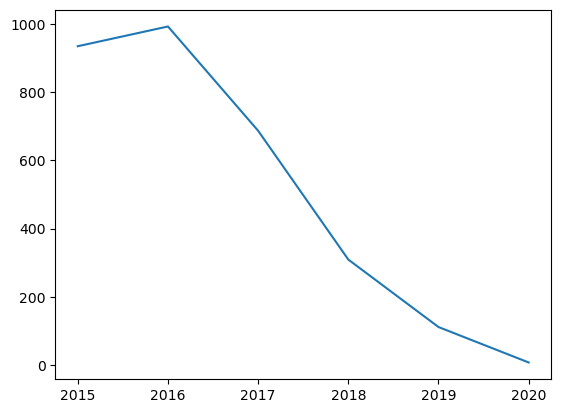

2015 935
2016 993
2017 687
2018 309
2019 111
2020 7


In [4]:
import matplotlib.pyplot as plt
import csv
import collections
file_obj=open("startup_funding.csv")
file_data=csv.DictReader(file_obj, skipinitialspace=True)
year_fundings={}
#year_fundings["2018"]=1
year_fundings["2015"]=5
for row in file_data:
    date=row["Date dd/mm/yyyy"]
    if date != "\\xc2\\xa010/7/2015":
        if date!="05/072018" and date!="12/05.2015" and date!="13/04.2015" and date!="15/01.2015" and date!="22/01//2015" and date!="01/07/015":
            year=date.split("/")[2]
            if year in year_fundings:
                year_fundings[year]+=1
            else:
                year_fundings[year]=1
ordDict=collections.OrderedDict(sorted(year_fundings.items())) 
plt.plot(list(ordDict.keys()), list(ordDict.values()))
plt.show()
for (key,value) in ordDict.items():
    print(key, value)

Problem statement
Given File 'startup_funding.csv'

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.

Output Format :
city1 number1
city2 number2
. . . 

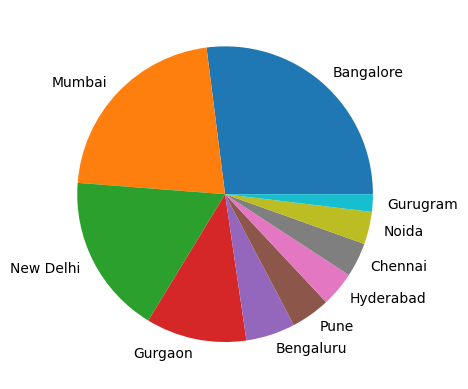

Bangalore 707
Mumbai 570
New Delhi 459
Gurgaon 288
Bengaluru 141
Pune 112
Hyderabad 100
Chennai 98
Noida 93
Gurugram 50


In [19]:
import matplotlib.pyplot as plt
import csv
import collections
from collections import Counter
file_obj=open("startup_funding.csv")
file_data=csv.DictReader(file_obj, skipinitialspace=True)
cities_startups={}
for row in file_data:
    city=row["City  Location"]
    if city!="":
        if city=="Delhi" or city=="New Delhi" or city=="New Delhi/ Houston":
            city="New Delhi"
        elif city=="bangalore" or city=="Bangalore/ Bangkok":
            city="Bangalore"
        elif city=="Chennai/ Singapore":
            city="Chennai"
        elif city=="Pune/Seattle":
            city="Pune"
        elif city=="Hyderabad/USA":
            city="Hyderabad"            
        elif len(city.split(" / "))==2:
            city=city.split(" / ")[0]
        elif city=="nan":
            continue
        if city in cities_startups:
            cities_startups[city]+=1
        else:
            cities_startups[city]=1
counter=Counter(cities_startups) 
top_10_cities_startups=counter.most_common(10) 
top_10_cities=[]
startups=[]
for tu in top_10_cities_startups:
    top_10_cities.append(tu[0])
    startups.append(tu[1])
plt.pie(startups, labels=top_10_cities)
plt.show()
for i in range(10):
    print(top_10_cities[i], startups[i])

Problem statement
Given File 'startup_funding.csv'

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.

Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 
. . .
. . .

C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\3120082630.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City  Location'].replace("Delhi","New Delhi",inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\3120082630.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

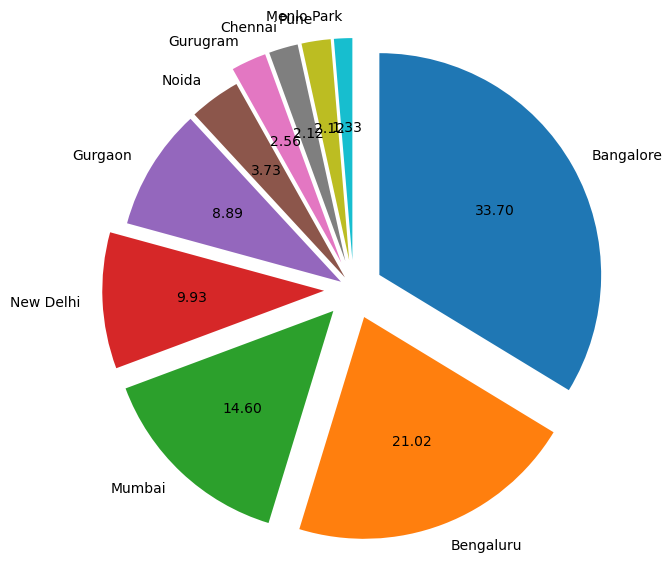

Bangalore 33.70
Bengaluru 21.02
Mumbai 14.60
New Delhi 9.93
Gurgaon 8.89
Noida 3.73
Gurugram 2.56
Chennai 2.12
Pune 2.12
Menlo Park 1.33


In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df.dropna(subset=["City  Location"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['City  Location'] = df['City  Location'].apply(separateCity)
df['City  Location'].replace("Delhi","New Delhi",inplace = True)
df['City  Location'].replace("bangalore","Bangalore",inplace = True)
def string_to_float(x):
    if type(x)==float:
        return x
    elif '\\\\' in x:
        x=x.split('\\')[-1][3:]
        if x=='N/A':
            return 0
        return float(x.replace(",",""))
    elif x=='undisclosed' or x=='Undisclosed' or x=='unknown' or x=='N/A' or x=='nan': 
        return 0
    elif type(x)==str and x[-1]=='+':
        return float(x[:-1].replace(",",""))
    else:
        return float((str(x).replace(",","")))
        
df['Amount in USD'] = df['Amount in USD'].apply(string_to_float)
df = df.groupby('City  Location')['Amount in USD'].sum()
df = df.sort_values(ascending = False)[0:10]
city = df.index
amount = df.values
explode = [0.2,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2]
plt.pie(amount,labels = city,autopct='%0.2f',counterclock=False,startangle=90,explode =explode,radius=1.5)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(city)):
    print(city[i],format(percent[i],'0.2f'))

Problem statement
Given File 'startup_funding.csv'

There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.

Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 

C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\13628986.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InvestmentnType'].replace('SeedFunding','Seed Funding',inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\13628986.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

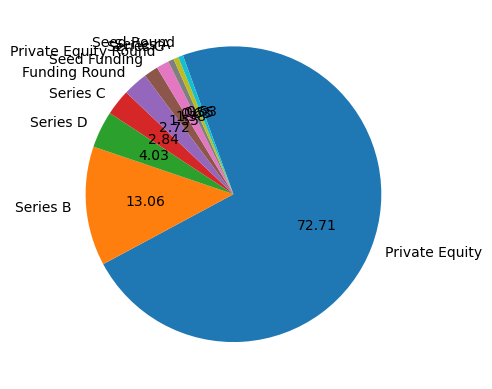

Private Equity 72.71
Series B 13.06
Series D 4.03
Series C 2.84
Funding Round 2.72
Seed Funding 1.55
Private Equity Round 1.38
Series G 0.63
Series A 0.55
Seed Round 0.53


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['InvestmentnType'].replace('SeedFunding','Seed Funding',inplace = True)
df['InvestmentnType'].replace('PrivateEquity','Private Equity',inplace = True)
df['InvestmentnType'].replace('DebtFunding','Debt Funding',inplace = True)
df['InvestmentnType'].replace('Crowd funding','Crowd Funding',inplace = True)
def string_to_float(x):
    if type(x)==float:
        return x
    elif '\\\\' in x:
        x=x.split('\\')[-1][3:]
        if x=='N/A':
            return 0
        return float(x.replace(",",""))
    elif x=='undisclosed' or x=='Undisclosed' or x=='unknown' or x=='N/A' or x=='nan': 
        return 0
    elif type(x)==str and x[-1]=='+':
        return float(x[:-1].replace(",",""))
    else:
        return float((str(x).replace(",","")))
df['Amount in USD'] = df['Amount in USD'].apply(string_to_float)

df = df.groupby('InvestmentnType')['Amount in USD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

Problem statement
Given File 'startup_funding.csv'

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.

Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . . 

C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\463613005.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry Vertical'].replace('ECommerce','Ecommerce',inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\463613005.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

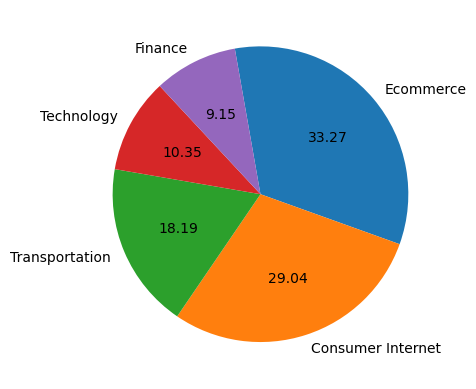

Ecommerce 33.27
Consumer Internet 29.04
Transportation 18.19
Technology 10.35
Finance 9.15


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['Industry Vertical'].replace('ECommerce','Ecommerce',inplace = True)
df['Industry Vertical'].replace('eCommerce','Ecommerce',inplace = True)
df['Industry Vertical'].replace('ecommerce','Ecommerce',inplace = True)
def string_to_float(x):
    if type(x)==float:
        return x
    elif '\\\\' in x:
        x=x.split('\\')[-1][3:]
        if x=='N/A':
            return 0
        return float(x.replace(",",""))
    elif x=='undisclosed' or x=='Undisclosed' or x=='unknown' or x=='N/A' or x=='nan': 
        return 0
    elif type(x)==str and x[-1]=='+':
        return float(x[:-1].replace(",",""))
    else:
        return float((str(x).replace(",","")))
df['Amount in USD'] = df['Amount in USD'].apply(string_to_float)
df = df.groupby('Industry Vertical')['Amount in USD'].sum()
df = df.sort_values(ascending = False)[:5]
industry = df.index
amount = df.values

plt.pie(amount,labels = industry,autopct='%0.2f',counterclock=False,startangle=100)
plt.show()
percent = np.true_divide(amount,amount.sum())*100
for i in range(len(industry)):
    print(industry[i],format(percent[i],'0.2f'))

Problem statement
Given File 'startup_funding.csv'

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1
startup2
startup3
. . . 

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace = True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace = True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace = True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace = True)
def string_to_float(x):
    if type(x)==float:
        return x
    elif '\\\\' in x:
        x=x.split('\\')[-1][3:]
        if x=='N/A':
            return 0
        return float(x.replace(",",""))
    elif x=='undisclosed' or x=='Undisclosed' or x=='unknown' or x=='N/A' or x=='nan': 
        return 0
    elif type(x)==str and x[-1]=='+':
        return float(x[:-1].replace(",",""))
    else:
        return float((str(x).replace(",","")))
df['Amount in USD'] = df['Amount in USD'].apply(string_to_float)
df = df.groupby('Startup Name')['Amount in USD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index
for i in range(5):
    print(startup[i])

Flipkart
Rapido Bike Taxi
Paytm
Ola
Oyo


C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\318763293.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\318763293.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Problem statement
Given File 'startup_funding.csv'

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

Output Format :
startup1 number1
startup2 number2
startup3 number3
. . . 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace = True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace = True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace = True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['Startup Name'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 13
Oyo 9
Paytm 8
Swiggy 8
Flipkart 6


C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\3891384363.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\3891384363.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Problem statement
Given File 'startup_funding.csv'

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.

Output Format :
investorname number

In [166]:
import pandas as pd
import numpy as np
import collections

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['Investors Name'].fillna("",inplace = True)
investors = df['Investors Name']

investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())
dct = {}
for i in investors_name:
    dct[i] = dct.get(i,0) + 1
#for i in dct:
 #   print(i, dct[i])
dct_keys = sorted(dct,key=dct.get,reverse=True)
print(dct_keys[0],dct[dct_keys[0]])

Sequoia Capital 72


C:\Users\DELL\AppData\Local\Temp\ipykernel_25804\997900884.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Investors Name'].fillna("",inplace = True)
